<a href="https://colab.research.google.com/github/krisnaaquino/dados/blob/main/Obitos_covid_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
#Carregando dados
dataset = pd.read_excel("/content/obitos.xlsx")

dataset.head(  )

,SEXO,IDADE
0,1,96
1,2,95
2,1,94
3,1,93
4,2,93


In [9]:
dataset.describe()

,SEXO,IDADE
count,107.000000,107.000000
mean,1.551402,72.766355
std,0.499691,15.839156
min,1.000000,31.000000
25%,1.000000,62.000000
50%,2.000000,78.000000
75%,2.000000,84.000000
max,2.000000,96.000000


In [10]:
X = dataset.iloc[:,:].values

print(X[0:6,:])

[[ 1 96]
 [ 2 95]
 [ 1 94]
 [ 1 93]
 [ 2 93]
 [ 2 93]]


In [32]:
# Normalização 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

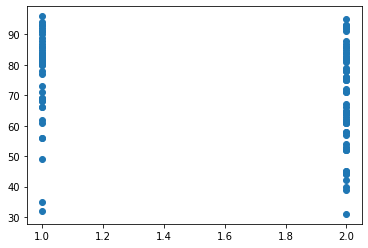

In [51]:
plt.scatter(X[:,0],X[:,1])
 

plt.show()  

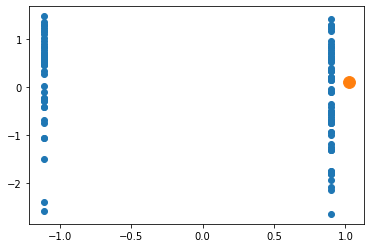

-1.1086778913041724 1.2834561866012364


In [49]:
sexo_e = 1.022
idade_e = 0.1 
plt.scatter(X_norm[:,0],X_norm[:,1])
plt.scatter([sexo_e],[idade_e], s = 140)
plt.show()  
print(X_norm[3,0],X_norm[3,1] )


In [52]:
exemplo =  sc.inverse_transform([sexo_e,idade_e])
print(exemplo)

[ 2.05969442 74.34285187]


In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(X_norm)

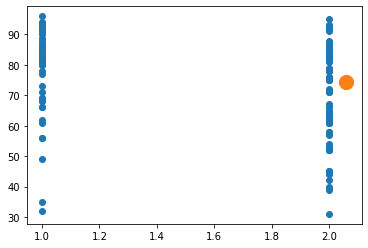

In [54]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(exemplo[0],exemplo[1], s = 200) 

plt.show()  

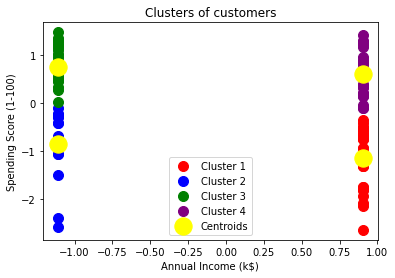

In [63]:
# Visualising the clusters
#plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'red', label = 'Data')

plt.scatter(X_norm[y_kmeans == 0, 0], X_norm[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_norm[y_kmeans == 1, 0], X_norm[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_norm[y_kmeans == 2, 0], X_norm[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_norm[y_kmeans == 3, 0], X_norm[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Nova seção

In [56]:
kmeans.cluster_centers_

array([[ 0.90197523, -1.15640207],
       [-1.10867789, -0.86416278],
       [-1.10867789,  0.75547987],
       [ 0.90197523,  0.60616843]])

In [57]:
c_originais = sc.inverse_transform(kmeans.cluster_centers_)
print(c_originais)

[[ 2.         54.53571429]
 [ 1.         59.14285714]
 [ 1.         84.67647059]
 [ 2.         82.32258065]]


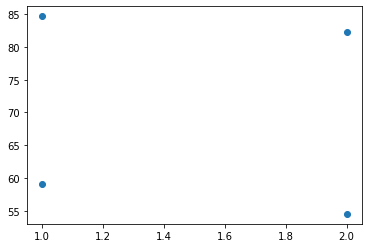

In [58]:
plt.scatter(c_originais[:,0],c_originais[:,1])
 

plt.show() 